In [65]:
from sklearn import datasets
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
colname = ['preg', 'plac', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age', 'class']

In [67]:
pima_df = pd.read_csv('C:\\Users\\USER\\Desktop\\Great learning file\\pima-indians-diabetes-2.data.csv', names=colname)

In [68]:
pima_df.head()
df = pima_df.copy()

In [69]:
df

,preg,plac,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [70]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
plac,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
pres,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
insu,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
mass,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [71]:
df.groupby(['class']).count()

,preg,plac,pres,skin,insu,mass,pedi,age
class,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


Text(0.5, 1.0, 'Class Distribution')

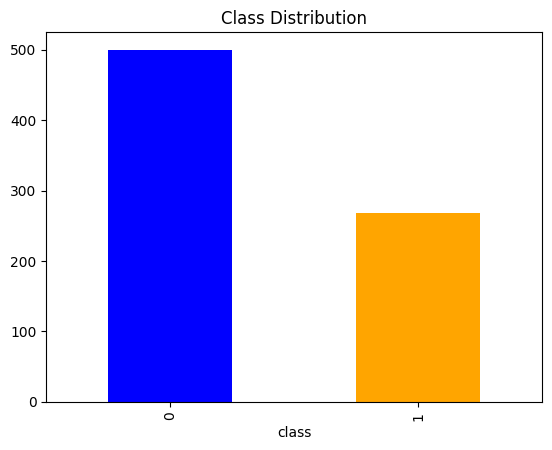

In [72]:
df.groupby(['class']).count()
df['class'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Class Distribution')

In [73]:
class_counts = df['class'].value_counts()
ratio = class_counts[0] / class_counts[1]
print(f"Class 0: {class_counts[0]}, Class 1: {class_counts[1]}, Ratio (0:1): {ratio:.2f}")

Class 0: 500, Class 1: 268, Ratio (0:1): 1.87


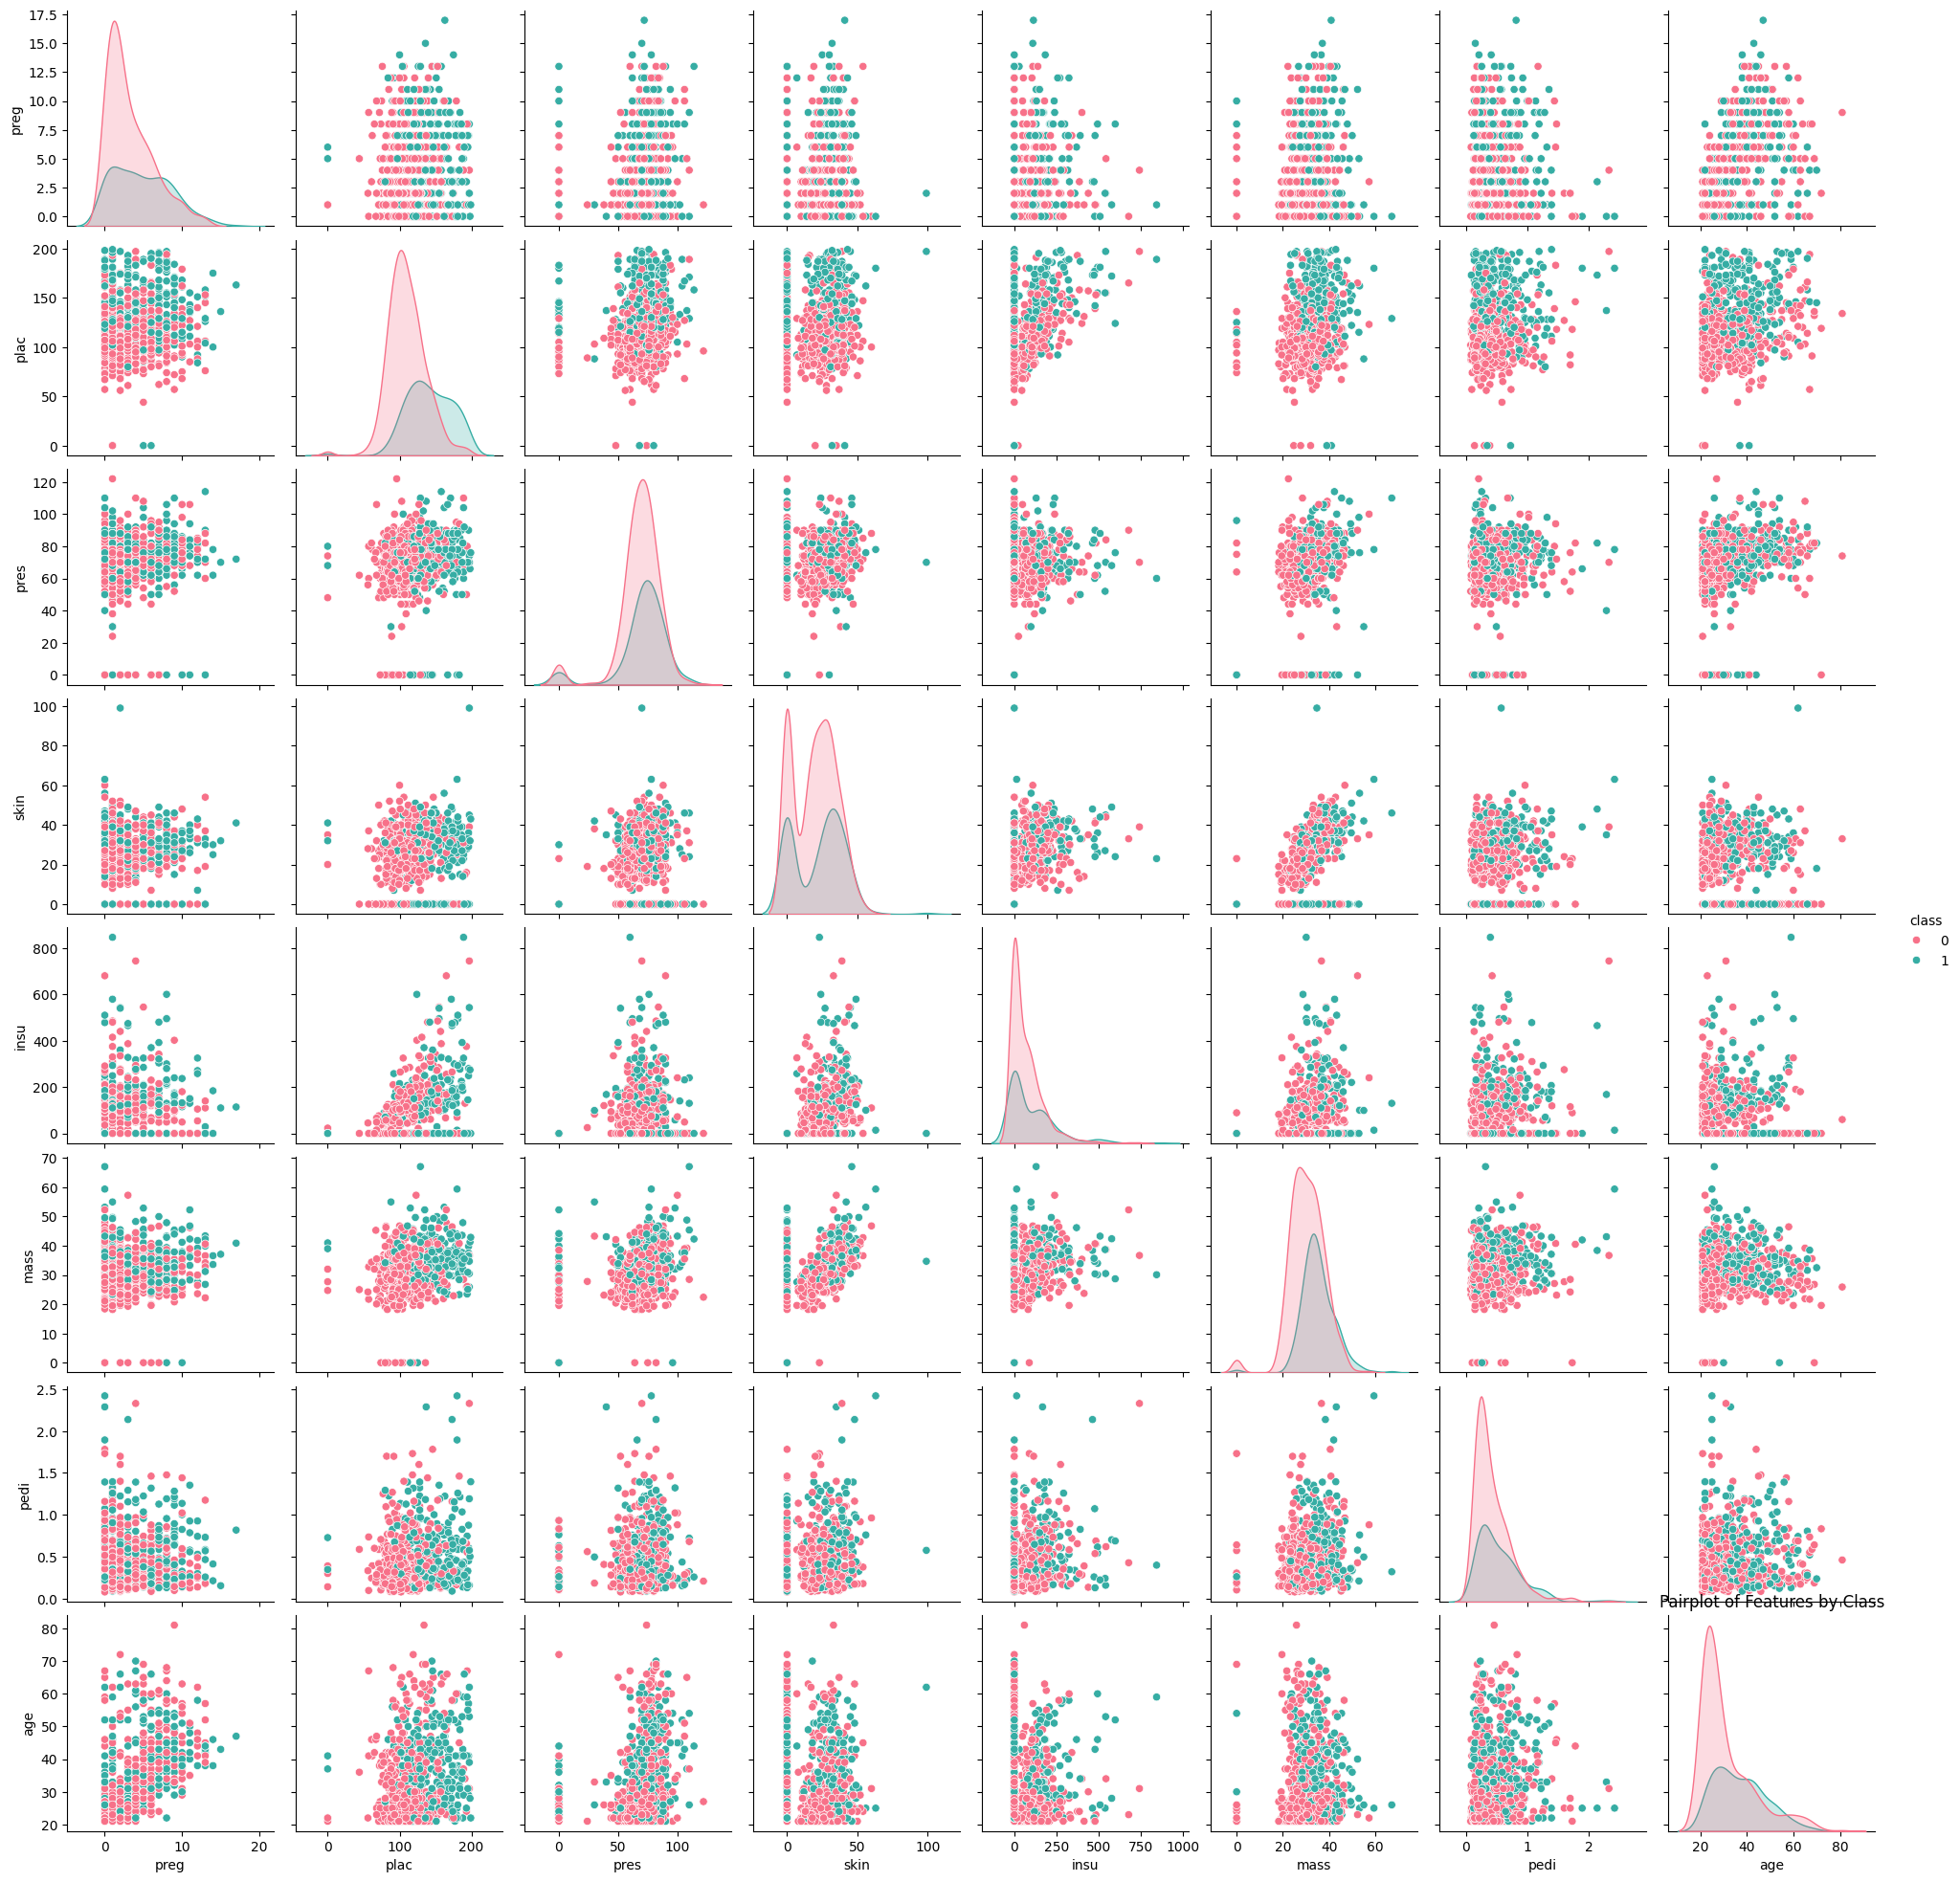

In [74]:
sns.pairplot(df, hue='class', diag_kind='kde', palette='husl')
plt.title('Pairplot of Features by Class')
plt.show()

In [75]:
array = df.values
x = array[:, 0:8]
y = array[:, 8]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
from sklearn import preprocessing 


In [76]:
from sklearn import preprocessing
x_train = preprocessing.StandardScaler().fit_transform(x_train)
x_test = preprocessing.StandardScaler().fit_transform(x_test)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)


LogisticRegression()

In [77]:
y_pred = model.predict(x_test)
print("Logistic Regression Model")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))     


Logistic Regression Model
Accuracy: 0.7445887445887446


In [78]:
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred))
print("Classification Report:\n", metrics.classification_report(y_test, y_pred))

Confusion Matrix:
 [[124  27]
 [ 32  48]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.79      0.82      0.81       151
         1.0       0.64      0.60      0.62        80

    accuracy                           0.74       231
   macro avg       0.72      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("SVM Model")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred))
print("Classification Report:\n", metrics.classification_report(y_test, y_pred))




SVM Model
Accuracy: 0.7532467532467533
Confusion Matrix:
 [[125  26]
 [ 31  49]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.83      0.81       151
         1.0       0.65      0.61      0.63        80

    accuracy                           0.75       231
   macro avg       0.73      0.72      0.72       231
weighted avg       0.75      0.75      0.75       231



In [80]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Random Forest Model")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred))
print("Classification Report:\n", metrics.classification_report(y_test, y_pred))

Random Forest Model
Accuracy: 0.7532467532467533
Confusion Matrix:
 [[122  29]
 [ 28  52]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.81      0.81       151
         1.0       0.64      0.65      0.65        80

    accuracy                           0.75       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.75      0.75      0.75       231



In [81]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score


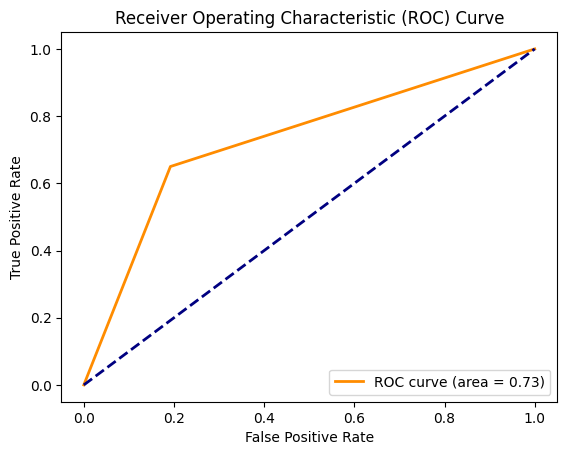

In [82]:
# Calculate the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()